In [2]:
!pip install supabase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.6/842.6 kB 10.0 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached h2-4.3.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached hyperframe-6.1.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached hpack-4.1.0-py3-none-any.whl.metadata (4.6 kB)
Using cached h2-4.3.0-py3-none-any.whl (61 kB)
Using cached hpack-4.1.0-py3-none-any.whl (34 kB)
Using cached hyperframe-6.1.0-py3-none-any.whl (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s  0:00:00
  Created wheel for pyiceberg: filename=pyiceberg-0.10.0-cp313-cp313-manylinux_2_39_x86_64.whl size=632945 sha256=8f9a2939c26efe177022213f5dd10f7ce54b34ea00e85a79537c818016c4b9cc
  Stored in directory: /home/douglas/.cache/pip/wheels/94/e1/ad/72718f6a4b508a4dcd74f62431dc44240ca3518c3837f58600
Successfully built pyiceberg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23/2

In [2]:
!pip install pandas sqlalchemy psycopg2-binary

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json

In [17]:
# Substitua pelos dados que você pegou no "Project Settings > Database" do Supabase
USER = 'postgres'
PASSWORD = '_xs#hiUAWeN6LMK'
HOST = 'db.pthfxmypcxqjfstqwokf.supabase.co'
PORT = '5432'
DBNAME = 'postgres'

# Cria a string de conexão
url_conexao = f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}'
engine = create_engine(url_conexao)

# Lê a tabela inteira diretamente para o Pandas
query = "SELECT * FROM hrv_sessions"
df = pd.read_sql(query, engine)

# Agora o 'df' contém todos os dados, sem os "..."
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    23 non-null     object             
 1   created_at            23 non-null     datetime64[ns, UTC]
 2   device_id             23 non-null     object             
 3   session_index         23 non-null     int64              
 4   timestamp_device_min  23 non-null     int64              
 5   fc_mean               0 non-null      object             
 6   sdnn                  0 non-null      object             
 7   rmssd                 0 non-null      object             
 8   pnn50                 0 non-null      object             
 9   rr_valid_count        0 non-null      object             
 10  tags                  0 non-null      object             
 11  rrr_intervals_ms      0 non-null      object             
 12  ir_wavefor

In [18]:
print(df.ir_waveform)

0     [61449, 61445, 61443, 61403, 61395, 61407, 614...
1     [62388, 62388, 62406, 62465, 62471, 62494, 625...
2     [55629, 64094, 64067, 64054, 63982, 63976, 639...
3     [47048, 47063, 47072, 47086, 47072, 47105, 471...
4     [45279, 44031, 44018, 44017, 43895, 43906, 438...
5     [2310, 2305, 2294, 2294, 2307, 2276, 2328, 228...
6     [57170, 57164, 49350, 49358, 49383, 49896, 499...
7     [65420, 65421, 65301, 65472, 65441, 65486, 654...
8     [275, 273, 160, 158, 171, 181, 152, 157, 140, ...
9     [53677, 53690, 53782, 53771, 53882, 53939, 539...
10    [58116, 58127, 58166, 58167, 58187, 58204, 582...
11    [55441, 55399, 55737, 55749, 55903, 55878, 558...
12    [45203, 45213, 45331, 45281, 45372, 45368, 453...
13    [48169, 48170, 48232, 48223, 48255, 48143, 483...
14    [2744, 2745, 2781, 2766, 2747, 2809, 2792, 280...
15    [45030, 45035, 45068, 45064, 45083, 45047, 450...
16    [65535, 65535, 65535, 65535, 65535, 65535, 655...
17    [65535, 65535, 65535, 65535, 65535, 65535,

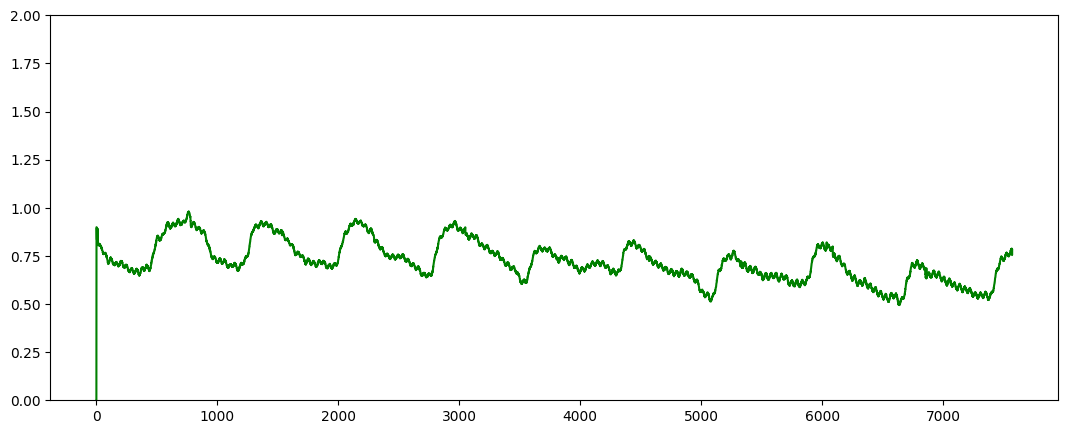

In [24]:
# 1. Seleciona os dados da mesma linha para ambos os LEDs
sinal_ir = df['ir_waveform'].iloc[6]
sinal_red = df['red_waveform'].iloc[22]


# 1. Normaliza (Transforma a escala para 0 até 1)
ir_norm = (sinal_ir - np.min(sinal_ir)) / (np.max(sinal_ir) - np.min(sinal_ir))
red_norm = (sinal_red - np.min(sinal_red)) / (np.max(sinal_red) - np.min(sinal_red))


# Inverte o sinal para que o batimento aponte para cima
ir_invertido = np.max(ir_norm) - ir_norm
red_invertido = np.max(red_norm) - red_norm

# 2. Cria o gráfico
plt.figure(figsize=(13, 5))

# Ajuste da escala (Como você tem dois sinais, talvez precise ampliar o range)
plt.ylim(0, 2)

# 2. Agora o Plot (Lembre-se de remover o plt.ylim antigo)
plt.plot(ir_invertido[:7570], color='green', label='IR Normalizado')
#plt.plot(red_invertido[:7570], color='red', label='RED Normalizado')